In [38]:
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt

In [39]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-21')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544996168477285.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544998169161678.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545000169737274.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545002070021119.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545003870327105.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545005770362518.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545007770911155.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

In [40]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.0044444444444444444, 0.060000000000000005, 0.11555555555555556, 0.1686111111111111, 0.21861111111111112, 0.2713888888888889, 0.3269444444444444, 0.3797222222222222, 0.4352777777777778, 0.4880555555555556, 0.5408333333333333, 0.596388888888889, 0.6547222222222222, 0.7269444444444445, 0.8019444444444445, 0.8769444444444445, 0.9519444444444444, 1.0269444444444444, 1.1019444444444446, 1.1769444444444446, 1.2519444444444445, 1.3269444444444445, 1.3991666666666667, 1.471388888888889, 1.5408333333333333, 1.6105555555555557, 1.6827777777777777, 1.7522222222222221, 1.8161111111111112, 1.8855555555555554, 1.952222222222222, 2.0244444444444443, 2.093888888888889, 2.1688888888888886, 2.2466666666666666, 2.3216666666666663, 2.3966666666666665, 2.4716666666666667, 2.5466666666666664, 2.6216666666666666, 2.6966666666666668, 2.7716666666666665, 2.8466666666666667, 2.924444444444444, 2.9994444444444444, 3.0744444444444445, 3.1494444444444443, 3.2247222222222223, 3.299722222222222, 3.374722222222222,

In [41]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [42]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[18.849417,98.9538],Time_zone=7,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

5.863020620227611 18.998388995225024


In [43]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [44]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [45]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=7)

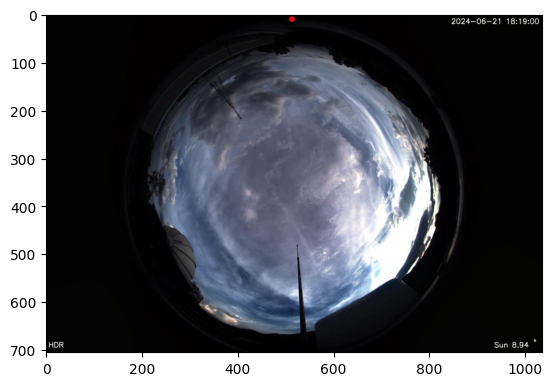

In [46]:
import cv2
from matplotlib import pyplot as plt
im = 325
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [47]:
crop_image = [preprocessData().crop_center(img=i,crop_size=570) for i in images]
Blue = [cv2.split(i)[2] for i in crop_image]
skewness = [preprocessData().calculate_skewness(data=B) for B in Blue]

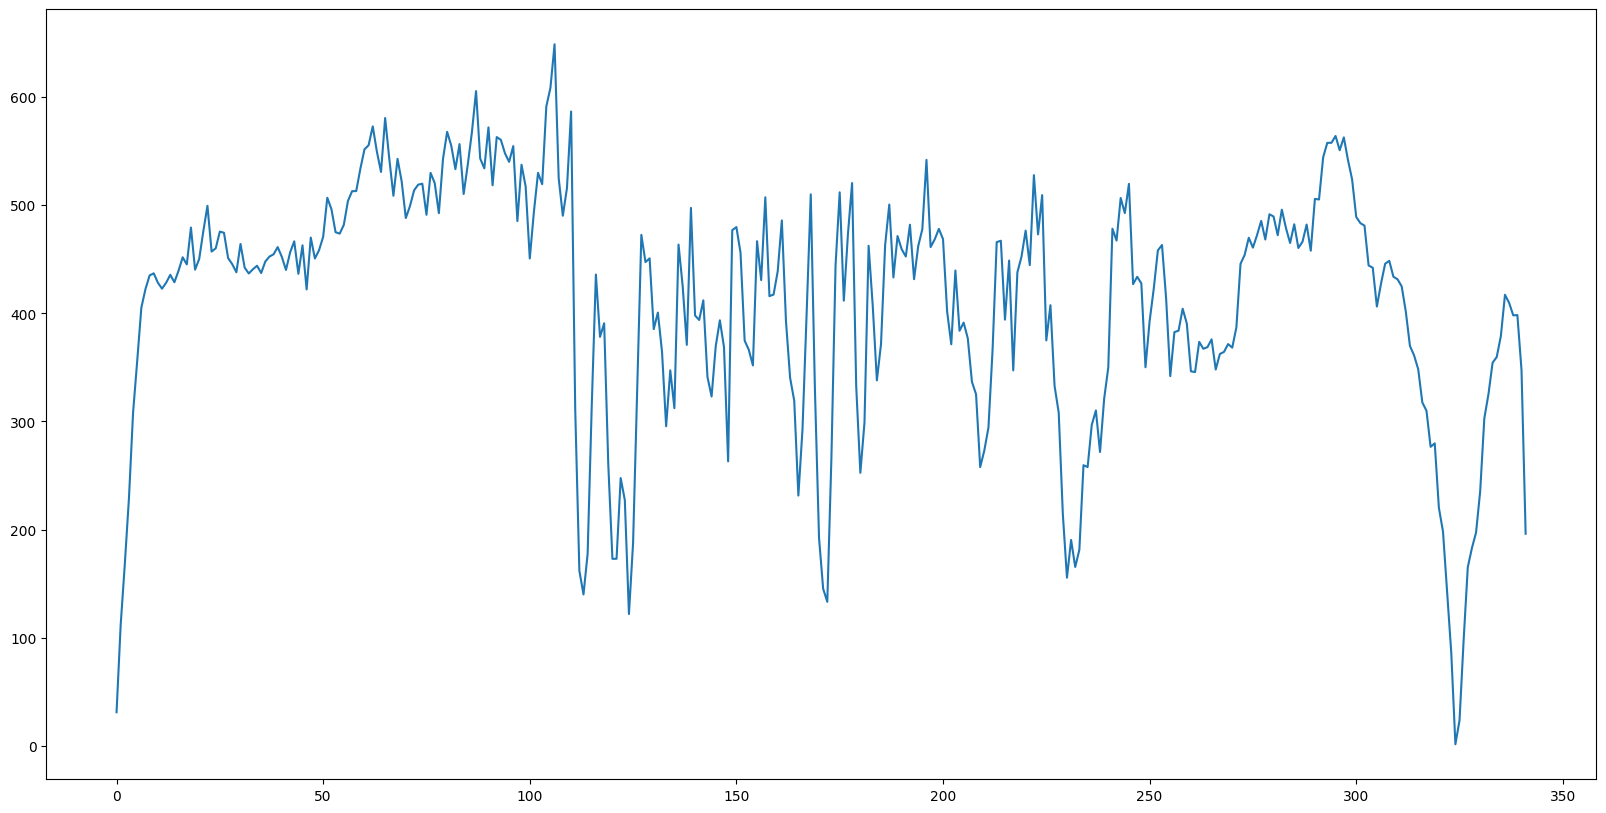

In [48]:
plt.figure(figsize=(20,10))
plt.plot(skewness)

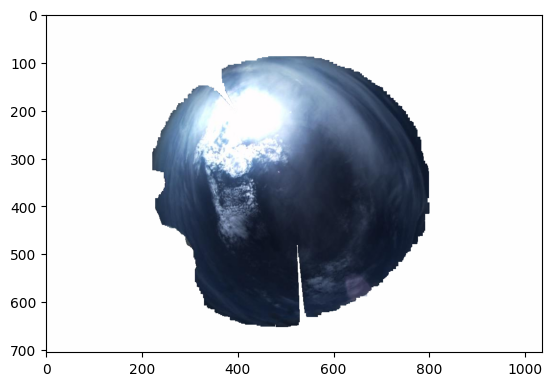

In [61]:
pic = cv2.imread(r'C:\Users\ASUS\Documents\NARIT_internship_data\Test_catagorical\Mostly cloudy\638541852120479571.png',cv2.IMREAD_UNCHANGED)
mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGBA)
trans_masked = mask < 1

pic[trans_masked,3] = int()
plt.imshow(pic)

In [62]:
R,G,B,A = cv2.split(pic)

In [63]:
print(A)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
